In [50]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [51]:
data = np.loadtxt("dataset.csv", delimiter=",", skiprows=1)
X = data[:, :2]
y = data[:, 2].astype(int)

np.random.seed(42)
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

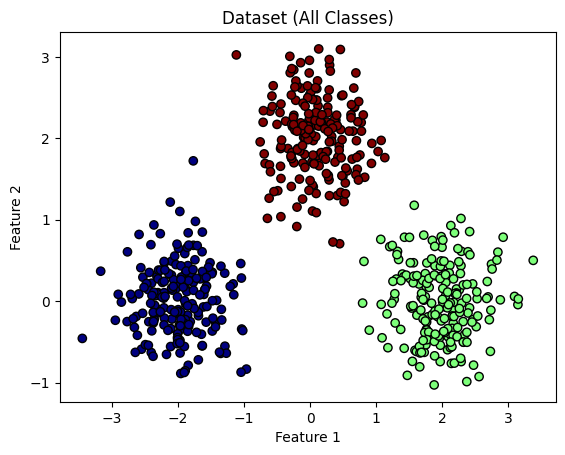

In [52]:
plt.scatter(X[:,0], X[:,1], c=y, cmap="jet", edgecolors="k")
plt.title("Dataset (All Classes)")
plt.show()

In [59]:
lr = 0.01
epochs = 200

In [63]:
np.random.seed(42)
W1 = np.random.randn(2, 5) * 0.1 
b1 = np.zeros((1, 5))
W2 = np.random.randn(5, 3) * 0.1   
b2 = np.zeros((1, 3))

def relu(x): return np.maximum(0, x)
def relu_deriv(x): return (x > 0).astype(float)
def softmax(z):
    e = np.exp(z - np.max(z, axis=1, keepdims=True))
    return e / np.sum(e, axis=1, keepdims=True)
def sparse_cross_entropy(y_true, y_pred):
    return -np.mean(np.log(y_pred[np.arange(len(y_true)), y_true] + 1e-9))

In [ ]:
for epoch in range(epochs):
    # Forward
    z1 = X_train @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    y_pred_train = softmax(z2)

    # Loss
    loss = sparse_cross_entropy(y_train, y_pred_train)

    # Backprop
    dz2 = y_pred_train.copy()
    dz2[np.arange(len(y_train)), y_train] -= 1
    dz2 /= len(y_train)

    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)

    da1 = dz2 @ W2.T
    dz1 = da1 * relu_deriv(z1)
    dW1 = X_train.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    W2 -= lr * dW2; b2 -= lr * db2
    W1 -= lr * dW1; b1 -= lr * db1

    if (epoch+1) % 50 == 0:
        acc_train = np.mean(np.argmax(y_pred_train, axis=1) == y_train)

        z1_test = X_test @ W1 + b1
        a1_test = relu(z1_test)
        z2_test = a1_test @ W2 + b2
        y_pred_test = softmax(z2_test)
        acc_test = np.mean(np.argmax(y_pred_test, axis=1) == y_test)

        print(f"Epoch {epoch}, Loss={loss:.4f}, Train Acc={acc_train:.3f}")


Epoch 0, Loss=0.8999, Train Acc=0.958
Epoch 50, Loss=0.8125, Train Acc=0.965
Epoch 100, Loss=0.7131, Train Acc=0.967
Epoch 150, Loss=0.6108, Train Acc=0.979


In [67]:
final_pred = np.argmax(y_pred_test, axis=1)
print(f"Test Acc={acc_test:.3f}")
print("\nTrue labels:     ", y_test[:20])
print("Predicted labels:", final_pred[:20])

Test Acc=0.958

True labels:      [1 2 2 2 0 1 2 2 2 1 1 0 0 1 1 0 2 0 0 2]
Predicted labels: [1 2 2 2 0 1 2 2 2 1 1 0 0 1 1 0 2 0 2 2]
